In [1]:
%matplotlib inline

import os
from os.path import join
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import numpy as np

In [2]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
compression_dir = join(dir_path, 'ball-data', 'compression')

Penn Extra Duty
Final Load at iteration 1: 459.4
Final Load at iteration 5: 447.4
Final Load at iteration 50: 434.3
Final Load at iteration 100: 431.2
Final Load at iteration 200: 428.0



Penn Regular Duty
Final Load at iteration 1: 485.9
Final Load at iteration 5: 468.1
Final Load at iteration 50: 451.9
Final Load at iteration 100: 448.0
Final Load at iteration 200: 444.7



Dunlop Hard Court
Final Load at iteration 1: 453.5
Final Load at iteration 5: 435.7
Final Load at iteration 50: 417.7
Final Load at iteration 100: 412.4
Final Load at iteration 200: 407.8



Wilson Regular Duty
Final Load at iteration 1: 513.8
Final Load at iteration 5: 494.6
Final Load at iteration 50: 477.0
Final Load at iteration 100: 472.1
Final Load at iteration 200: 467.4



Dunlop All Surface
Final Load at iteration 1: 441.6
Final Load at iteration 5: 422.9
Final Load at iteration 50: 405.1
Final Load at iteration 100: 400.2
Final Load at iteration 200: 395.4



Penn World Tour
Final Load at iteration 1: 4

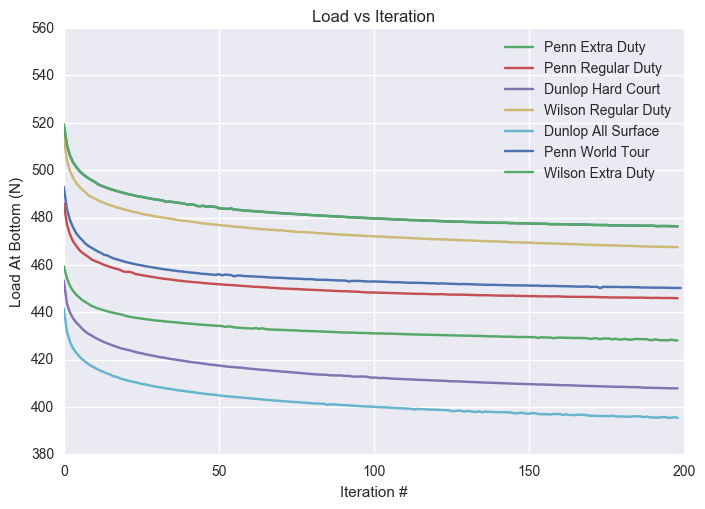

In [3]:
d = {}
for subdir, dirs, files in os.walk(compression_dir):
    for f in files:
        folder = os.path.split(subdir)[1]
        if '.' in folder:
            ball_name = folder[:folder.index('.')]
            d[ball_name] = {'times': [[]], 'extensions': [[]], 'loads': [[]], 'going_down': [[]], 'max_load': []}
            curr_iter = 0
            with open(os.path.join(subdir, f), 'rb') as csvfile:
                reader = csv.reader(csvfile, delimiter=',')
                curr_iter = 0
                prev_going_down = True
                for i, row in enumerate(reader):
                    if i >= 2:
                        going_down = True
                        time, ext, load = [float(r) for r in row]
                        load = -load
                        ext = -ext
                        if len(d[ball_name]['extensions'][-1]) > 0:
                            prev = d[ball_name]['extensions'][-1][-1]
                            going_down = prev < ext
                        if prev_going_down == False and going_down == True:
                            d[ball_name]['max_load'].append(max(d[ball_name]['loads'][-1]))
                            d[ball_name]['extensions'].append([])
                            d[ball_name]['times'].append([])
                            d[ball_name]['loads'].append([])
                            d[ball_name]['going_down'].append([])
                        d[ball_name]['times'][-1].append(time)
                        d[ball_name]['extensions'][-1].append(ext)
                        d[ball_name]['loads'][-1].append(load)
                        d[ball_name]['going_down'][-1].append(going_down)
                        prev_going_down = going_down
                    
for ball in d:
    print '====================='
    print ball
    print '====================='
    plt.clf()
    x = 'extension'
    y = 'load'
    for i, (e, l, g) in enumerate(zip(d[ball]['extensions'], d[ball]['loads'], d[ball]['going_down'])):
        e  = np.array(e)
        l = np.array(l)
        g = np.array(g)
    #     print g
    #     if i + 1 in [1, 2, 3, 5, 10, 100]:
        if i + 1 in [1, 5, 50, 100, 200]:
            plt.plot(e[g], l[g], label='Iteration #' + str(i + 1))
            print ("Final Load at iteration " + str(i+1) + ": " + str(round(l[g][-1], 1)))
    plt.legend()
    plt.xlabel('Compression (mm)')
    plt.ylabel('Load (N)')
    plt.title(ball + ' Resistance while compressing')
    plt.ylim([0, 550])
    plt.savefig(os.path.join(compression_dir, 'img', ball + "_load_vs_ext.svg"))
    plt.clf()
    plt.plot(d[ball]['max_load'][:-2])
    plt.xlabel('Iteration #')
    plt.ylabel('Load At Bottom (N)')
    plt.ylim([380, 560])
    plt.title(ball + ' Load vs Iteration')
    plt.savefig(os.path.join(compression_dir, 'img', ball + "_load_vs_iter.svg"))
    print
    print
    print

for ball in d:
    plt.plot(d[ball]['max_load'][:-2], label=ball)
    plt.xlabel('Iteration #')
    plt.ylabel('Load At Bottom (N)')
    plt.ylim([380, 560])
    plt.title('Load vs Iteration')
plt.legend(loc=0)

plt.savefig(os.path.join(compression_dir, 'img', 'all_balls' + "_load_vs_iter.svg"))

In [4]:
def get_x_y_from_filepath(filepath):
    return None, None